In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from phase_amplitude_diagram.phase_amplitude_diagram import plot_normalized_scatter as diag

In [2]:
from phase_amplitude_diagram.phase_amplitude_diagram import plot_normalized_scatter as diag

In [3]:
wave = 'IG1'

# Input wave filtered file
fili1 = f'/media/athul/DATA/data_work_pc_kit/imerg_v7_filtered/{wave}_imerg_filt.4x.5S.5N.nc'

# Latitude band
lati = -5
latf = 5

# Longitude over which the phase_amplitude plot is draw
lon = 30

# initialize the dataset and the filtered_variable
f1 = xr.open_dataset(fili1)
data1 = f1.filt.sel(lat=slice(lati,latf)).mean('lat')

# Standard deviations of the field and its time derivative over all times and lons in the latitude band(s)
# These values need to be passed into the plotting function
data1_std = data1.std()
d_data1_std = data1.differentiate('time').std()

# data selected at the required longitude
data1 = data1.sel(lon=lon)

In [4]:
# Required times (change this according to the needs)
years = np.arange(2001,2024,1)

seas = 'Custom'

if seas=='JAS':
    strt = '07/01/'
    last = '09/30/' 
elif seas=='MJ':
    strt = '05/01/'
    last = '06/30/'
elif seas=='MA':
    strt = '03/01/'
    last = '04/30/'
elif seas=='DJF':
    strt = '12/01/'
    last = '02/28/'
elif seas=='ON':
    strt = '10/01/'
    last = '11/30/'
else:
    print(f'Custom period')
    strt = '04/15/'
    last = '05/15/'

Custom period


In [5]:
# frequnecy of the timesteps
frequency = '6H' 
# compute the timesteps to be passed on to the function. This is required to compute the correct climatology
t = pd.to_datetime([])
for year in years:
    t0 = pd.date_range(start=strt+str(year), end=last+str(year), freq=frequency)
    t  = t.union(t0)

In [6]:
# Optional

# Dates for Rwanda flood Event periods
start1 = '2023-04-23T00:00'
end1 = '2023-04-30T18:00'
start2 = '2023-05-01T00:00'
end2 = '2023-05-10T18:00'

# Rwanda Events periods
event_period1 = np.array(pd.date_range(start=start1, end=end1, freq=frequency))
event_period2 = np.array(pd.date_range(start=start2, end=end2, freq=frequency))

event_periods = (event_period1,event_period2)

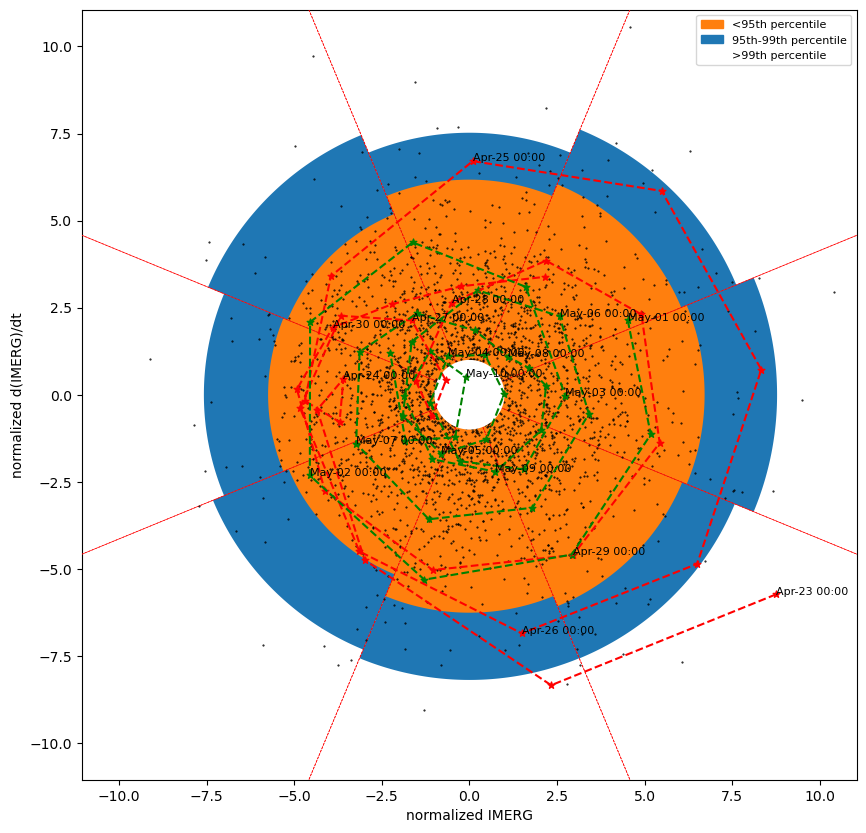

In [7]:
# Initialize a figure and axis for plotting. The axis object needs to be passed onto the plotting function
figure, ax = plt.subplots(figsize=(10,10))

normalized_A, normalized_derivative = diag(A=data1, stdA=data1_std, std_dA=d_data1_std, quantile1=95, quantile2=99, ax=ax, wave=wave, time=t)

'''
Since the plotting functions accepts the ax object. Modifications can be made to the figure generated.
'''

# Event 1
mask1 = normalized_A.time.isin(event_period1)
event1_ind = np.where(mask1)[0]

high_A1 = normalized_A[event1_ind]
high_dA1 = normalized_derivative[event1_ind]

ax.scatter(high_A1, high_dA1, s=25, zorder=6, color='red', marker='*')
ax.plot(high_A1, high_dA1, c='red', lw=1.5, zorder=7, ls='--')

# Add annotations for each point in the scatter plot
date_frequency = 4
if (wave=='MJO' or wave=='ER'):
    date_frequency = 10
for i, txt1 in enumerate(normalized_A.time[mask1].to_index().strftime('%b-%d %H:00')):
    # print('annotate')
    if i%date_frequency==0:
        ax.annotate(text=txt1, xy=(high_A1[i],high_dA1[i]), size=8, color='black', zorder=8)

# Event 2
mask2 = normalized_A.time.isin(event_period2)
event2_ind = np.where(mask2)[0]

high_A2 = normalized_A[event2_ind]
high_dA2 = normalized_derivative[event2_ind]

ax.scatter(high_A2, high_dA2, s=25, zorder=6, color='green', marker='*')
ax.plot(high_A2, high_dA2, c='green', lw=1.5, zorder=7, ls='--')

# Add annotations for each point in the scatter plot
date_frequency = 4
if (wave=='MJO' or wave=='ER'):
    date_frequency = 10
for i, txt2 in enumerate(normalized_A.time[mask2].to_index().strftime('%b-%d %H:00')):
    # print('annotate')
    if i%date_frequency==0:
        ax.annotate(text=txt2, xy=(high_A2[i],high_dA2[i]), size=8, color='black', zorder=8)